#/Users/adityagupta/Documents/share/stratquest_dataset.csv
dataset

#FILTER DATA 

In [1]:
import pandas as pd
import numpy as np
import re
dataset="/Users/adityagupta/Documents/share/stratquest_dataset.csv"
df = pd.read_csv(dataset)
df['Scheduled_Arrival'] = pd.to_datetime(df['Scheduled_Arrival'], errors='coerce')
df['Actual_Arrival'] = pd.to_datetime(df['Actual_Arrival'], errors='coerce')
df['Scheduled_Departure'] = pd.to_datetime(df['Scheduled_Departure'], errors='coerce')
df['Actual_Departure'] = pd.to_datetime(df['Actual_Departure'], errors='coerce')
df_clean = df.dropna()

x = df_clean[df_clean['WeatherCondition'].str.match(r'^\d+$')].index.to_list()
df_clean=df_clean.drop(x)

df_clean['arrival_diff_min'] = (
    (df_clean['Actual_Arrival'] - df_clean['Scheduled_Arrival'])
    .dt.total_seconds() / 60
)

df_final = df_clean[df_clean['arrival_diff_min'] >= 15]
df_clean['departure_diff_min'] = (
    (df_clean['Actual_Departure'] - df_clean['Scheduled_Departure'])
    .dt.total_seconds() / 60
)
df_final['departure_diff_min'] = df_final.index.map(
    df_clean['departure_diff_min']
)

print(f"Rows before cleaning: {len(df)}")
print(f"Rows after dropping, the mssing data rows  : {len(df_clean)}")

print(f"Rows after cleaning: {len(df_final)}")


df_final.to_csv("cleaned_train_data_final.csv", index=False)

print("The mean of number of stops per train",df["Number_of_Stops"].mean())
print("The mean of number of stops per train",df["Actual_Travel_Time_min"].mean())
print(df["Scheduled_Travel_Time_min"].mean())
print()
x=df_clean['arrival_diff_min'].to_list()
for i in range(0,9999):
    if (x[i]<0):
        del(x[i])







/var/folders/z2/449hb0615b3dhhlww2_lpglc0000gn/T/ipykernel_12477/1336515410.py:5: DtypeWarning: Columns (15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset)
/var/folders/z2/449hb0615b3dhhlww2_lpglc0000gn/T/ipykernel_12477/1336515410.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['departure_diff_min'] = df_final.index.map(


Rows before cleaning: 100000
Rows after dropping, the mssing data rows  : 55590
Rows after cleaning: 19831
The mean of number of stops per train 7.99481
The mean of number of stops per train 412.72434801841837
402.29788



In [2]:
#days data 
df_final['Day_of_Week'].describe()
sunday_arrival_diff = df_final[df_final['Day_of_Week'] == 'Sunday']['arrival_diff_min']
print("median delay on sundays",sunday_arrival_diff.median(),"mean",sunday_arrival_diff.mean())
monday_arrival_diff = df_final[df_final['Day_of_Week'] == 'Monday']['arrival_diff_min']
print("median delay on monday",monday_arrival_diff.median(),"mean",monday_arrival_diff.mean())
tuesday_arrival_diff = df_final[df_final['Day_of_Week'] == 'Tuesday']['arrival_diff_min']
print("median delay on tuesdays",tuesday_arrival_diff.median(),"mean",tuesday_arrival_diff.mean())
wednesday_arrival_diff = df_final[df_final['Day_of_Week'] == 'Wednesday']['arrival_diff_min']
print("median delay on wednesday",wednesday_arrival_diff.median(),"mean",wednesday_arrival_diff.mean())
thursday_arrival_diff = df_final[df_final['Day_of_Week'] == 'Thursday']['arrival_diff_min']
print("median delay on Thursday",thursday_arrival_diff.median(),"mean",thursday_arrival_diff.mean())
friday_arrival_diff = df_final[df_final['Day_of_Week'] == 'Friday']['arrival_diff_min']
print("median delay on friday",friday_arrival_diff.median(),"mean",friday_arrival_diff.mean())
saturday_arrival_diff = df_final[df_final['Day_of_Week'] == 'Saturday']['arrival_diff_min']
print("median delay on saturdays",saturday_arrival_diff.median(),"mean",saturday_arrival_diff.mean() )


median delay on sundays 28.0 mean 34.79507651363939
median delay on monday 28.0 mean 35.25362062875309
median delay on tuesdays 26.0 mean 34.912768202602884
median delay on wednesday 28.0 mean 34.9924023154848
median delay on Thursday 30.0 mean 35.85316455696203
median delay on friday 27.0 mean 34.73422159887798
median delay on saturdays 28.0 mean 35.331407942238265


In [3]:
df_final['WeatherCondition'].describe()

count     19831
unique        6
top       Clear
freq       8904
Name: WeatherCondition, dtype: object

WEATHER CONDITION AFFECTING DELAYS

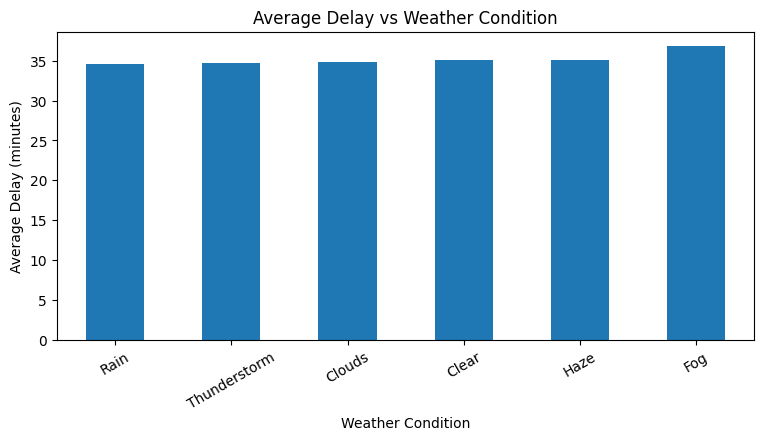

In [4]:

import matplotlib.pyplot as plt

weather_delay = (
    df_final.groupby("WeatherCondition")["arrival_diff_min"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(9,4))
weather_delay.plot(kind="bar")
plt.title("Average Delay vs Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=30)
plt.show()

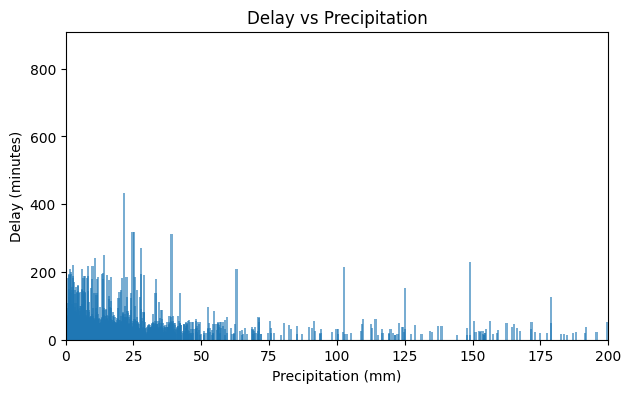

In [5]:
plt.figure(figsize=(7,4))
plt.bar(
    df_final["Precipitation_mm"],
    df_final["arrival_diff_min"],
    alpha=0.6
)

plt.xlabel("Precipitation (mm)")
plt.ylabel("Delay (minutes)")
plt.title("Delay vs Precipitation")
plt.xlim(0, 200)
plt.show()

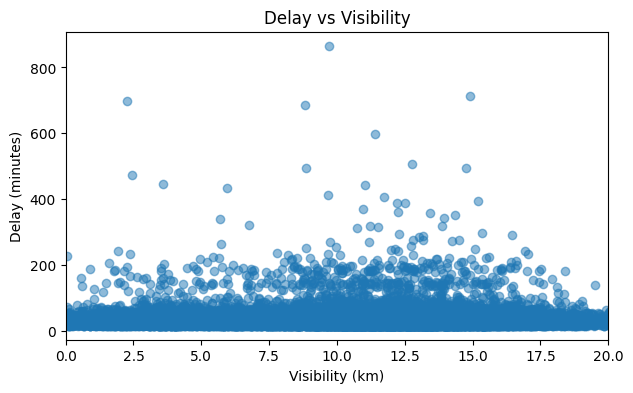

np.float64(11.021699863849529)

In [6]:
plt.figure(figsize=(7,4))
plt.scatter(
    df_final["Visibility_km"],
    df_final["arrival_diff_min"],
    alpha=0.5
)

plt.xlabel("Visibility (km)")
plt.ylabel("Delay (minutes)")
plt.title("Delay vs Visibility")
plt.xlim(0,20)
plt.show()

df_final['Visibility_km'].mean()

/var/folders/z2/449hb0615b3dhhlww2_lpglc0000gn/T/ipykernel_12477/3681949664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Temperature_C"] = pd.to_numeric(df_final["Temperature_C"], errors="coerce")


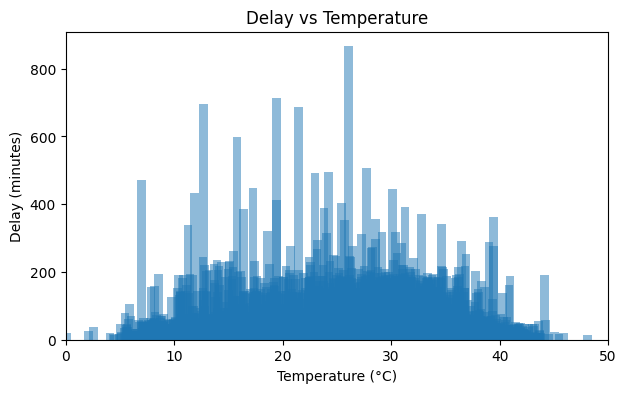

In [7]:

df_final["Temperature_C"] = pd.to_numeric(df_final["Temperature_C"], errors="coerce")

plt.figure(figsize=(7,4))
plt.bar(
    df_final["Temperature_C"],
    df_final["arrival_diff_min"],
    alpha=0.5
)

plt.xlabel("Temperature (°C)")
plt.ylabel("Delay (minutes)")
plt.title("Delay vs Temperature")
plt.xlim(0,50)
plt.xscale('linear')
plt.show()

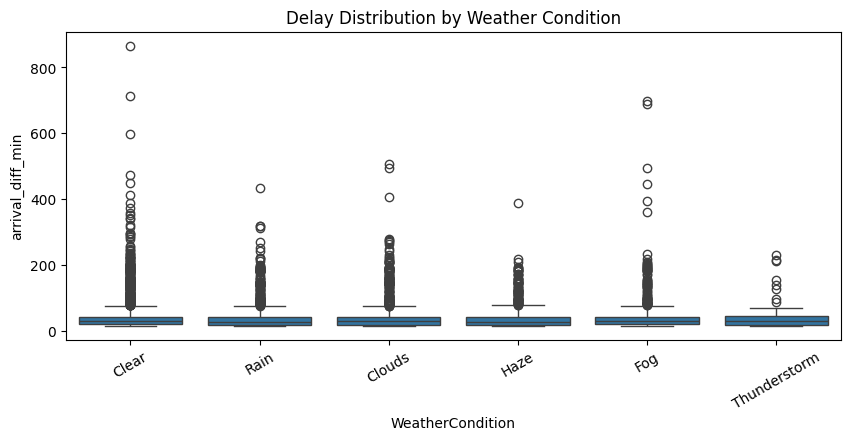

In [8]:
import seaborn as sns

plt.figure(figsize=(10,4))
sns.boxplot(
    x="WeatherCondition",
    y="arrival_diff_min",
    data=df_final
)

plt.xticks(rotation=30)
plt.title("Delay Distribution by Weather Condition")
plt.show()

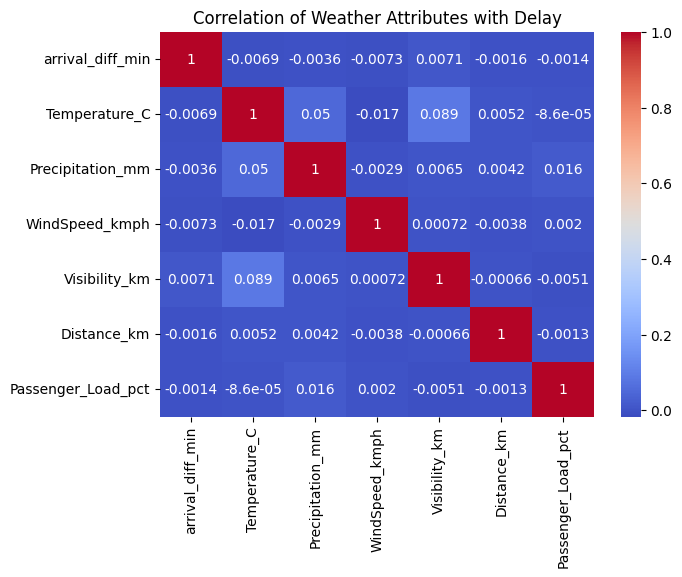

,Unnamed: 0,Distance_km,Scheduled_Departure,Scheduled_Arrival,Actual_Departure,Actual_Arrival,Scheduled_Travel_Time_min,Actual_Travel_Time_min,Departure_Delay_min,Arrival_Delay_min,...,Passenger_Load_pct,Loco_Type,Humidity_pct,Precipitation_mm,WindSpeed_kmph,Visibility_km,Pressure_hPa,WeatherCondition,arrival_diff_min,departure_diff_min
13,13,347,2024-10-27 21:20:50,2024-10-28 04:32:50,2024-10-27 21:29:50,2024-10-28 04:58:50,432,449.0,9.0,26,...,61.4,Electric,47.82,0.00,20.85,14.39,1009.88,Clear,26.0,9.0
14,14,169,2023-12-09 18:42:17,2023-12-09 23:17:17,2023-12-09 18:42:17,2023-12-09 23:53:17,275,311.0,0.0,36,...,102.7,Electric,33.77,0.00,9.39,5.28,1007.27,Clear,36.0,0.0
23,23,2079,2023-07-29 04:24:07,2023-07-30 22:00:07,2023-07-29 04:26:07,2023-07-30 22:15:07,2496,2509.0,2.0,15,...,94.4,Electric,73.8,9.71,15.42,9.67,1018.64,Rain,15.0,2.0
24,24,162,2024-10-18 19:54:02,2024-10-18 23:04:02,2024-10-18 19:59:02,2024-10-18 23:57:02,190,238.0,5.0,53,...,66.1,Electric,63.41,0.00,7.60,18.14,1002.27,Clouds,53.0,5.0
28,28,141,2023-02-03 13:16:32,2023-02-03 16:38:32,2023-02-03 13:21:32,2023-02-03 17:31:32,202,250.0,5.0,53,...,80.8,Electric,58.66,0.00,4.19,10.43,1010.60,Haze,53.0,5.0


In [9]:
plt.figure(figsize=(7,5))
corr = df_final[
    [
        "arrival_diff_min",
        "Temperature_C",
        "Precipitation_mm",
        "WindSpeed_kmph",
        "Visibility_km",
        "Distance_km",
        "Passenger_Load_pct",
        


    ]
].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Weather Attributes with Delay")
plt.show()
df_final.head()

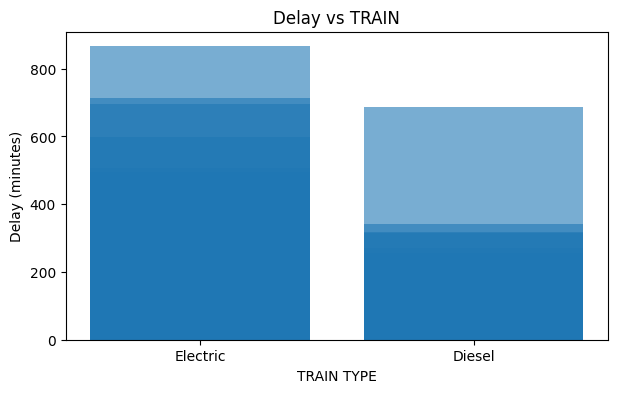

In [12]:
plt.figure(figsize=(7,4))
plt.bar(
    df_final["Loco_Type"],
    df_final["arrival_diff_min"],
    alpha=0.6
)

plt.xlabel("TRAIN TYPE")
plt.ylabel("Delay (minutes)")
plt.title("Delay vs TRAIN")
plt.show()